<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/StockPrice_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 25.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf

In [8]:
ticker = '^NSEI'
nse = yf.Ticker(ticker)

In [10]:
df = nse.history(period = 'max')

In [11]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,0,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,0,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0,0


In [12]:
df.reset_index(inplace = True)

In [27]:
trg = df.iloc[:int(len(df)*0.7),1:2].values
test = df.iloc[int(len(df)*0.7):,1:2].values

In [42]:
test

array([[10585.75      ],
       [10537.90039062],
       [10596.20019531],
       ...,
       [16010.79980469],
       [16151.40039062],
       [16187.04980469]])

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_trg = scaler.fit_transform(trg)

In [29]:
len(scaled_trg)

2544

In [30]:
X_train = []
y_train = []
for i in range(60,len(scaled_trg)):
    X_train.append(scaled_trg[i-60:i,0])
    y_train.append(scaled_trg[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [31]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2484, 60, 1)

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [34]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 128))

In [35]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
78/78 [==============================] - 16s 121ms/step - loss: 0.0599
Epoch 2/100
78/78 [==============================] - 9s 119ms/step - loss: 0.0088
Epoch 3/100
78/78 [==============================] - 9s 119ms/step - loss: 0.0062
Epoch 4/100
78/78 [==============================] - 9s 119ms/step - loss: 0.0053
Epoch 5/100
78/78 [==============================] - 9s 120ms/step - loss: 0.0045
Epoch 6/100
78/78 [==============================] - 9s 120ms/step - loss: 0.0041
Epoch 7/100
78/78 [==============================] - 9s 121ms/step - loss: 0.0036
Epoch 8/100
78/78 [==============================] - 10s 127ms/step - loss: 0.0034
Epoch 9/100
78/78 [==============================] - 9s 122ms/step - loss: 0.0032
Epoch 10/100
78/78 [==============================] - 9s 121ms/step - loss: 0.0029
Epoch 11/100
78/78 [==============================] - 9s 120ms/step - loss: 0.0025
Epoch 12/100
78/78 [==============================] - 9s 119ms/step - loss: 0.0024
Epoch 13/10

In [48]:
inputs = test

In [49]:
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,len(test)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [50]:
pred = regressor.predict(X_test)
pred = scaler.inverse_transform(pred)

In [51]:
pred

array([[10726.816 , 10739.748 , 10734.345 , ..., 10732.888 , 10724.078 ,
        10737.206 ],
       [10747.514 , 10760.497 , 10755.077 , ..., 10753.636 , 10744.789 ,
        10758.002 ],
       [10741.3955, 10754.225 , 10749.036 , ..., 10747.534 , 10738.605 ,
        10751.877 ],
       ...,
       [14507.582 , 14528.613 , 14530.526 , ..., 14532.024 , 14510.444 ,
        14548.939 ],
       [14497.263 , 14518.341 , 14520.324 , ..., 14521.768 , 14500.193 ,
        14538.564 ],
       [14499.68  , 14521.082 , 14522.751 , ..., 14524.232 , 14502.71  ,
        14541.062 ]], dtype=float32)

Text(0.5, 1.0, 'Stock Price Prediction')

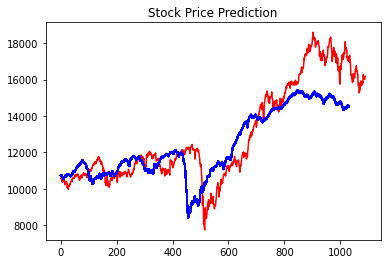

In [52]:
plt.plot(test,color = 'red', label = 'Actual Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
# plt.legend()